# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

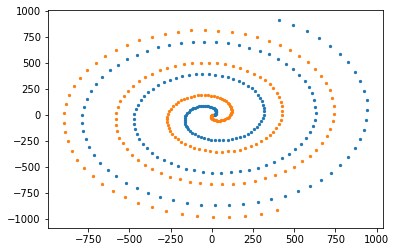

In [5]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt
%matplotlib inline

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

0    201
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [12]:
# your code here
df.head()
# df.shape
df.columns
df['CLASS'].value_counts()

0    201
1    200
Name: CLASS, dtype: int64

In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['X', 'Y']], df['CLASS'], test_size=0.2, random_state=42)

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(6, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(8, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(8, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(6, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

10/10 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4875
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4969
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5156
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6918 - accuracy: 0.5031
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5344
Epoch 6/100
1

10/10 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5531
Epoch 76/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5531
Epoch 77/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5531
Epoch 78/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5531
Epoch 79/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5531
Epoch 80/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5531
Epoch 81/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5531
Epoch 82/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.5531
Epoch 83/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5531
Epoch 84/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5500
Epoch 85/100


In [22]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

3/3 [==============================] - 0s 7ms/step - loss: 0.7067 - accuracy: 0.4198
0.7067434191703796 0.4197530746459961
